# It ain't that easy to find the area of the circle on a [screen of pixels](https://mathworld.wolfram.com/GausssCircleProblem.html)...

In [1]:
from matplotlib.pyplot import plot, show
from math import floor, sqrt, pi as π
from numpy import add

$$
   GCA\left(r\right) = 1 + 4\left\lfloor r\right\rfloor
                         + 4\sum_{i = 1}^{\left\lfloor r\right\rfloor}
                           \left\lfloor \sqrt{r^2 - i^2} \right\rfloor
$$

In [2]:
def Gauss_circle_area(r: float):
    r_floor = int(floor(r))
    rs = [floor(sqrt(r*r - i*i)) for i in range(1, r_floor)]
    area = 1 + 4*r_floor + 4*add.reduce(rs)
    return area

$$
   GCA_{II}\left(r\right) = 1 + 4\sum_{i = 1}^{r^2} (-1)^{i-1}\left\lfloor \frac{r^2}{2i - 1} \right\rfloor
$$
*Caveat emptor*: the complexity is **skyrocketing** now! $O\left(r^2\right)$ 

r = 10: π*r**2 = 314.16 sq. whatevers vs. Gauss_circle_area(r) = 317 vs. Gauss_circle_area_II(r) = 317 sq. pixels
r = 13: π*r**2 = 530.93 sq. whatevers vs. Gauss_circle_area(r) = 529 vs. Gauss_circle_area_II(r) = 529 sq. pixels


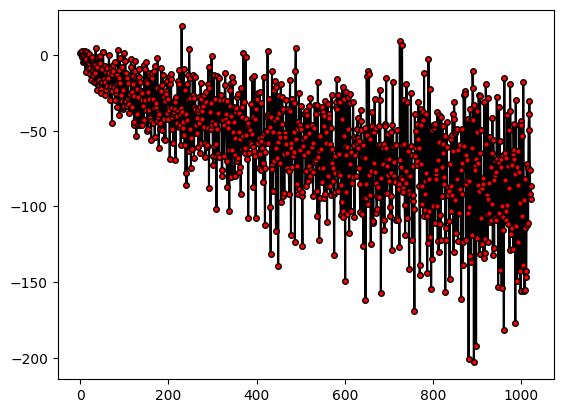

In [3]:
def Gauss_circle_area_II(r: float):
    rs = [(1 if i%2 == 1 else -1)*floor(r*r/(2*i - 1)) for i in range(1, int(r*r))]
    area = 1 + 4*add.reduce(rs)
    return area

for r in (10, 13):
    print(f'{r = }: {π*r**2 = :.2f} sq. whatevers vs. {Gauss_circle_area(r) = } vs. {Gauss_circle_area_II(r) = } sq. pixels')
_ = plot([Gauss_circle_area(r) - π*r**2 for r in range(0x400)], 'ko', ls='-', ms = 0o4, markerfacecolor = 'r' ), show()


Good luck, Copilot, with implementation of that stuff:
$$
   GCA_{III}\left(r\right) = 1 + 4\sum_{i = 0}^{\infty} \left( \left\lfloor \frac{r^2}{4i + 1} \right\rfloor - \left\lfloor \frac{r^2}{4i + 3} \right\rfloor \right)
$$

... and guess what? Copilot just did this!

r = 10: π*r**2 = 314.16 sq. whatevers vs. Gauss_circle_area(r) = 317 vs. Gauss_circle_area_II(r) = 317 vs. Gauss_circle_area_III(r) = 269 sq. pixels
r = 13: π*r**2 = 530.93 sq. whatevers vs. Gauss_circle_area(r) = 529 vs. Gauss_circle_area_II(r) = 529 vs. Gauss_circle_area_III(r) = 453 sq. pixels


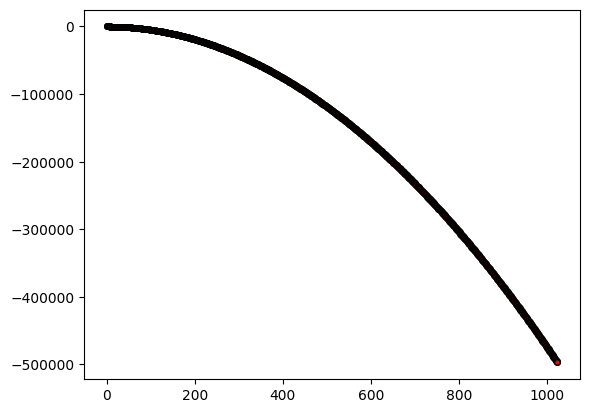

In [8]:
def Gauss_circle_area_III(r: float, max_iter: int = 1):
   rs = [floor(r*r/(4*i + 1)) - floor(r*r/(4*i + 3)) for i in range(max_iter)]
   area = 1 + 4*add.reduce(rs)
   return area

# Example usage
for r in (10, 13):
   print(f'{r = }: {π*r**2 = :.2f} sq. whatevers vs. {Gauss_circle_area(r) = } vs. {Gauss_circle_area_II(r) = } vs. {Gauss_circle_area_III(r) = } sq. pixels')
_ = plot([Gauss_circle_area_III(r) - π*r**2 for r in range(0x400)], 'ko', ls='-', ms = 0o4, markerfacecolor = 'r' ), show()